کد مربوطه به مقاله ارسالی با عنوان:

### ترکیب روش آسیب مغزی بهینه و منظم‌سازی تُنُک ‌ در کوچک‌سازی یک مدل یادگیری عمیق

به لحاظ ماهیت تصادفی مقداردهی اولیه‌ی وزنهای شبکه‌های عصبی و روال آموزش شبکه، اختلافات جزیی در اجراهای مختلف وجود دارد.

M. Amintoosi, m.amintoosi at gmail.com

In [1]:
import os, time
if hasattr(time, 'tzset'):
    os.environ['TZ'] = 'Asia/Tehran'
    time.tzset()
print(time.strftime('%Y/​%m/%d, %X'))

2021/​06/15, 13:17:29


In [2]:
import torch
torch.manual_seed(1)
import random
random.seed(1)

In [4]:
!pip install pycm

     |████████████████████████████████| 71kB 6.1MB/s 
     |████████████████████████████████| 573kB 21.1MB/s 


In [5]:
!git clone https://github.com/mamintoosi/Reg-OBD-for-VGG-Pruning

Cloning into 'CNN-Pruning'...
remote: Enumerating objects: 167, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 167 (delta 99), reused 116 (delta 48), pack-reused 0
Receiving objects: 100% (167/167), 126.31 KiB | 930.00 KiB/s, done.
Resolving deltas: 100% (99/99), done.


In [6]:
%cd Reg-OBD-for-VGG-Pruning

/content/CNN-Pruning


In [ ]:
%%time
# Transfer Learning: Train the VGG16 model
torch.manual_seed(1)
random.seed(1)
# Download a pre-trained VGG16 model and train it
%run finetune_SpReg_pds.py --train --use-cuda \
  --train_epoch 10 --ds_name 'FashionMNIST' \
  --output_model 'vgg'

FashionMNIST
Using CUDA...


Accuracy on  val : 0.852 	 Loss: 0.40693655074574053
Accuracy on  val : 0.852 	 Loss: 0.42859710939228535
Accuracy on  val : 0.851 	 Loss: 0.4312006624531932
Accuracy on  val : 0.876 	 Loss: 0.39487762667704374
Accuracy on  val : 0.861 	 Loss: 0.48264251989894547
Accuracy on  val : 0.873 	 Loss: 0.4846992801176384
Accuracy on  val : 0.858 	 Loss: 0.458834963850677
Accuracy on  val : 0.862 	 Loss: 0.5352201492059976
Accuracy on  val : 0.864 	 Loss: 0.5457228007144295
Accuracy on  val : 0.877 	 Loss: 0.5141506615327671

Finished fine tuning.
Accuracy on  test : 0.897 	 Loss: 0.42206745594739914
CPU times: user 6min 49s, sys: 12.8 s, total: 7min 2s
Wall time: 7min 10s


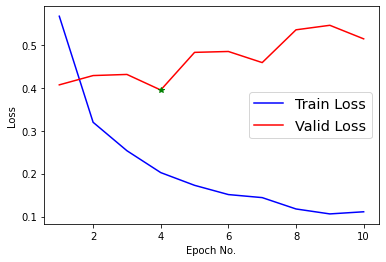

3


In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,len(Train_loss)+1), Train_loss, label='Train Loss', color='blue')
ax.plot(np.arange(1,len(Train_loss)+1), Val_loss, label='Valid Loss', color = 'red')
ax.plot(np.argmin(Val_loss)+1, np.min(Val_loss),'g*')
# legend = ax.legend(loc='upper right', fontsize='x-large')
legend = ax.legend(loc='center right', fontsize='x-large')
plt.xlabel('Epoch No.')
plt.ylabel('Loss')
plt.show()
print(np.argmin(Val_loss))

FashionMNIST
Using CUDA...
Accuracy on  test : 0.889 	 Loss: 0.3709481715923175
ACC=0.89
0:0.92	1:0.98	2:0.90	3:0.91	4:0.92	5:0.97	6:0.82	7:0.98	8:0.99	9:0.96
FNR:0.12, FPR:0.01
TNR:0.99, TPR:0.88
CPU times: user 4.98 s, sys: 585 ms, total: 5.56 s
Wall time: 5.67 s


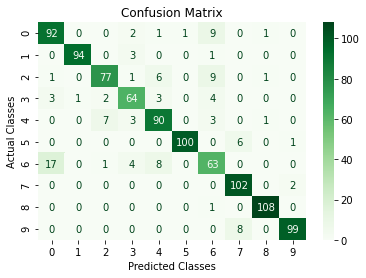

In [ ]:
%%time
# Test report the trained model 
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --test --use-cuda --ds_name 'FashionMNIST' \
  --input_model 'vgg' --output_model 'vgg'

In [ ]:
!ls -as models

total 524648
     4 .       4 ..       0 for_models.txt  524640 vgg.pt


In [ ]:
%%time
# Pruning the trained model using HSQGL12 method
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --prune --use-cuda --train_epoch 20 --reg_name 'HSQGL12' --ds_name 'FashionMNIST' \
  --input_model 'vgg' --output_model 'HSQGL12' --landa 1e-5

FashionMNIST
Using CUDA...
Using Regularization:  HSQGL12
Accuracy on  val : 0.876 	 Loss: 0.39487762667704374
Retraining with regularization ... 


Accuracy on  val : 0.829 	 Loss: 0.4493200352881104
Accuracy on  val : 0.84 	 Loss: 0.46475220983847976
Accuracy on  val : 0.86 	 Loss: 0.41035186406224966
Accuracy on  val : 0.859 	 Loss: 0.35719644965138286
Accuracy on  val : 0.879 	 Loss: 0.3420894497539848
Accuracy on  val : 0.849 	 Loss: 0.4427294635679573
Accuracy on  val : 0.872 	 Loss: 0.3709768611006439
Accuracy on  val : 0.873 	 Loss: 0.3334813197143376
Accuracy on  val : 0.88 	 Loss: 0.3182881355751306
Accuracy on  val : 0.869 	 Loss: 0.3554743927670643
Accuracy on  val : 0.893 	 Loss: 0.3005351070314646
Accuracy on  val : 0.889 	 Loss: 0.29066167131531984
Accuracy on  val : 0.875 	 Loss: 0.33619834389537573
Accuracy on  val : 0.869 	 Loss: 0.36800590297207236
Accuracy on  val : 0.875 	 Loss: 0.34284267225302756
Accuracy on  val : 0.869 	 Loss: 0.3309525931254029
Accuracy on  val : 0.856 	 Loss: 0.42310002353042364
Accuracy on  val : 0.882 	 Loss: 0.3295287801884115
Accuracy on  val : 0.89 	 Loss: 0.3128461597952992
Accuracy

FashionMNIST
Using CUDA...
Accuracy on  test : 0.888 	 Loss: 0.3158440876286477
ACC=0.89
0:0.89	1:0.98	2:0.93	3:0.91	4:0.91	5:0.98	6:0.83	7:0.99	8:0.99	9:0.96
FNR:0.12, FPR:0.01
TNR:0.99, TPR:0.88
CPU times: user 5.09 s, sys: 588 ms, total: 5.68 s
Wall time: 5.83 s


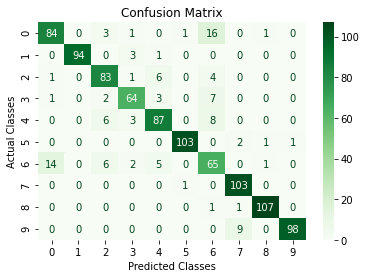

In [ ]:
%%time
# Test report for HSQGL12 method
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --test --use-cuda --ds_name 'FashionMNIST' \
  --input_model 'HSQGL12' --output_model 'HSQGL12'

In [ ]:
!ls -as models

total 1278568
     4 .        0 for_models.txt  229280 OBD.pt
     4 ..  524640 HSQGL12.pt	  524640 vgg.pt


In [ ]:
# Pruning the trained model using OBD method
%%time
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --prune --use-cuda --ds_name 'FashionMNIST' \
  --input_model 'vgg' --output_model 'OBD' \
  --eat 3

FashionMNIST
Using CUDA...
Accuracy on  val : 0.876 	 Loss: 0.39487762667704374
5
Number of prunning iterations to reduce 70% filters: 5
Iter:  1 / 5
Ranking filters.. 
Layers that will be prunned {0: 12, 17: 78, 10: 33, 24: 53, 19: 72, 14: 25, 21: 74, 26: 74, 7: 6, 2: 9, 28: 41, 12: 26, 5: 9}
Prunning filters.. 
Filters prunned 12.121212121212125%
Accuracy on  val : 0.866 	 Loss: 0.3831114824861288
Fine tuning to recover from prunning iteration.


Accuracy on  val : 0.873 	 Loss: 0.36645752331241965
Accuracy on  val : 0.863 	 Loss: 0.3895961248781532
Accuracy on  val : 0.821 	 Loss: 0.6065470860339701

Finished fine tuning.
Iter:  2 / 5
Ranking filters.. 
Layers that will be prunned {24: 59, 17: 63, 14: 39, 21: 80, 26: 55, 28: 65, 19: 61, 12: 45, 0: 5, 10: 19, 7: 14, 5: 6, 2: 1}
Prunning filters.. 
Filters prunned 24.24242424242425%
Accuracy on  val : 0.818 	 Loss: 0.5449229311197996
Fine tuning to recover from prunning iteration.


Accuracy on  val : 0.878 	 Loss: 0.3679308768478222
Accuracy on  val : 0.877 	 Loss: 0.40319659607484937
Accuracy on  val : 0.887 	 Loss: 0.3761204892070964

Finished fine tuning.
Iter:  3 / 5
Ranking filters.. 
Layers that will be prunned {19: 74, 24: 81, 28: 68, 26: 54, 5: 5, 21: 66, 12: 19, 10: 29, 17: 57, 7: 21, 2: 8, 14: 23, 0: 7}
Prunning filters.. 
Filters prunned 36.36363636363637%
Accuracy on  val : 0.882 	 Loss: 0.35293575399555266
Fine tuning to recover from prunning iteration.


Accuracy on  val : 0.876 	 Loss: 0.4332036223495379
Accuracy on  val : 0.895 	 Loss: 0.37403405213262886
Accuracy on  val : 0.875 	 Loss: 0.4659583102911711

Finished fine tuning.
Iter:  4 / 5
Ranking filters.. 
Layers that will be prunned {21: 58, 28: 70, 14: 26, 19: 63, 24: 61, 17: 59, 26: 62, 7: 16, 12: 32, 10: 30, 0: 9, 5: 14, 2: 12}
Prunning filters.. 
Filters prunned 48.484848484848484%
Accuracy on  val : 0.845 	 Loss: 0.4345138263888657
Fine tuning to recover from prunning iteration.


Accuracy on  val : 0.888 	 Loss: 0.3323187150526792
Accuracy on  val : 0.882 	 Loss: 0.3940564803779125
Accuracy on  val : 0.893 	 Loss: 0.40555583860259503

Finished fine tuning.
Iter:  5 / 5
Ranking filters.. 
Layers that will be prunned {17: 60, 28: 70, 0: 6, 14: 30, 24: 72, 21: 76, 19: 56, 10: 39, 26: 64, 7: 5, 12: 20, 5: 11, 2: 3}
Prunning filters.. 
Filters prunned 60.60606060606061%
Accuracy on  val : 0.783 	 Loss: 0.6820824183523655
Fine tuning to recover from prunning iteration.


Accuracy on  val : 0.867 	 Loss: 0.43422311125323176
Accuracy on  val : 0.894 	 Loss: 0.3538321254309267
Accuracy on  val : 0.862 	 Loss: 0.42591654357966036

Finished fine tuning.
Accuracy on  test : 0.874 	 Loss: 0.42081881256308407
CPU times: user 28min 29s, sys: 36.2 s, total: 29min 5s
Wall time: 29min 24s


FashionMNIST
Using CUDA...
Accuracy on  test : 0.901 	 Loss: 0.3408374722348526
ACC=0.90
0:0.85	1:0.99	2:0.95	3:0.91	4:0.91	5:0.99	6:0.88	7:0.98	8:1.00	9:0.98
FNR:0.10, FPR:0.01
TNR:0.99, TPR:0.90
CPU times: user 2.19 s, sys: 486 ms, total: 2.67 s
Wall time: 3.27 s


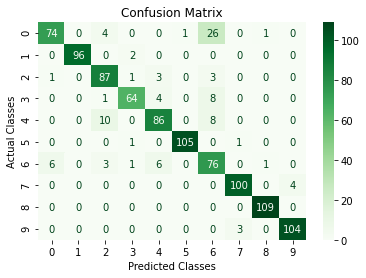

In [ ]:
%%time
# Test report for OBD method
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --test --use-cuda --ds_name 'FashionMNIST' \
  --input_model 'OBD' --output_model 'OBD'

In [ ]:
!ls -as models

total 1278568
     4 .        0 for_models.txt  229280 OBD.pt
     4 ..  524640 HSQGL12.pt	  524640 vgg.pt


In [ ]:
%%time
# Train HSQGL12_OBD
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --prune --use-cuda --ds_name 'FashionMNIST' \
  --input_model 'HSQGL12' --output_model 'HSQGL12_OBD' \
  --eat 3 

FashionMNIST
Using CUDA...
Accuracy on  val : 0.889 	 Loss: 0.29066167131531984
5
Number of prunning iterations to reduce 70% filters: 5
Iter:  1 / 5
Ranking filters.. 
Layers that will be prunned {0: 13, 2: 8, 5: 6, 7: 11, 10: 30, 12: 37, 14: 23, 17: 116, 19: 82, 21: 59, 24: 62, 26: 45, 28: 20}
Prunning filters.. 
Filters prunned 12.121212121212125%
Accuracy on  val : 0.89 	 Loss: 0.29038459237199277
Fine tuning to recover from prunning iteration.


Accuracy on  val : 0.882 	 Loss: 0.3288072075229138
Accuracy on  val : 0.847 	 Loss: 0.41897560423240066
Accuracy on  val : 0.872 	 Loss: 0.3130799101199955

Finished fine tuning.
Iter:  2 / 5
Ranking filters.. 
Layers that will be prunned {2: 1, 5: 2, 7: 3, 10: 9, 12: 33, 14: 25, 17: 89, 19: 106, 21: 92, 24: 69, 26: 48, 28: 35}
Prunning filters.. 
Filters prunned 24.24242424242425%
Accuracy on  val : 0.872 	 Loss: 0.3130800253711641
Fine tuning to recover from prunning iteration.


Accuracy on  val : 0.89 	 Loss: 0.32569160405546427
Accuracy on  val : 0.868 	 Loss: 0.41035954048857093
Accuracy on  val : 0.868 	 Loss: 0.389875854132697

Finished fine tuning.
Iter:  3 / 5
Ranking filters.. 
Layers that will be prunned {5: 3, 7: 13, 10: 16, 12: 34, 14: 32, 17: 71, 19: 97, 21: 88, 24: 63, 26: 67, 28: 28}
Prunning filters.. 
Filters prunned 36.36363636363637%
Accuracy on  val : 0.868 	 Loss: 0.3898735248949379
Fine tuning to recover from prunning iteration.


Accuracy on  val : 0.889 	 Loss: 0.3133979808771983
Accuracy on  val : 0.897 	 Loss: 0.31461008777841926
Accuracy on  val : 0.899 	 Loss: 0.3399771598633379

Finished fine tuning.
Iter:  4 / 5
Ranking filters.. 
Layers that will be prunned {5: 7, 7: 17, 10: 39, 12: 16, 14: 29, 17: 63, 19: 47, 21: 64, 24: 73, 26: 102, 28: 50, 2: 4, 0: 1}
Prunning filters.. 
Filters prunned 48.484848484848484%
Accuracy on  val : 0.9 	 Loss: 0.3386879481258802
Fine tuning to recover from prunning iteration.


Accuracy on  val : 0.879 	 Loss: 0.35986996156862006
Accuracy on  val : 0.888 	 Loss: 0.4248029306763783
Accuracy on  val : 0.898 	 Loss: 0.3470936893718317

Finished fine tuning.
Iter:  5 / 5
Ranking filters.. 
Layers that will be prunned {28: 56, 19: 46, 21: 53, 24: 62, 7: 24, 17: 71, 14: 34, 26: 65, 12: 27, 2: 10, 5: 13, 10: 46, 0: 5}
Prunning filters.. 
Filters prunned 60.60606060606061%
Accuracy on  val : 0.888 	 Loss: 0.3408271928783506
Fine tuning to recover from prunning iteration.


Accuracy on  val : 0.889 	 Loss: 0.36943446355871856
Accuracy on  val : 0.878 	 Loss: 0.34506482235156
Accuracy on  val : 0.892 	 Loss: 0.3583171275240602

Finished fine tuning.
Accuracy on  test : 0.894 	 Loss: 0.4182214438333176
CPU times: user 28min 57s, sys: 40.4 s, total: 29min 37s
Wall time: 29min 57s


FashionMNIST
Using CUDA...
Accuracy on  test : 0.888 	 Loss: 0.3690994097851217
ACC=0.89
0:0.85	1:0.97	2:0.95	3:0.95	4:0.90	5:0.98	6:0.81	7:0.99	8:0.99	9:0.98
FNR:0.11, FPR:0.01
TNR:0.99, TPR:0.89
CPU times: user 2.71 s, sys: 550 ms, total: 3.26 s
Wall time: 3.54 s


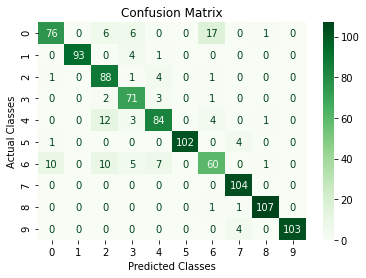

In [ ]:
%%time
# Test report for HSQGL12+OBD method
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --test --use-cuda --ds_name 'FashionMNIST' \
  --input_model 'HSQGL12_OBD' --output_model 'HSQGL12_OBD'

In [ ]:
# Print Model Sizes
!ls -as models

total 1605008
     4 .        0 for_models.txt  524640 HSQGL12.pt  524640 vgg.pt
     4 ..  326440 HSQGL12_OBD.pt  229280 OBD.pt


In [14]:
%%time
# Pruning the OBD pruned model using HSQGL12 method
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --prune --use-cuda --train_epoch 20 --reg_name 'HSQGL12' --ds_name 'FashionMNIST' \
  --input_model 'OBD' --output_model 'OBD_HSQGL12' --landa 1e-5

FashionMNIST
Using CUDA...



Extracting /content/data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/data/FashionMNIST/raw




Extracting /content/data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/data/FashionMNIST/raw




Extracting /content/data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/data/FashionMNIST/raw




Extracting /content/data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/data/FashionMNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Using Regularization:  HSQGL12
Accuracy on  val : 0.894 	 Loss: 0.3538321109954268
Retraining with regularization ... 


Accuracy on  val : 0.877 	 Loss: 0.38017771672457457
Accuracy on  val : 0.867 	 Loss: 0.3999075726605952
Accuracy on  val : 0.891 	 Loss: 0.31618002452887595
Accuracy on  val : 0.887 	 Loss: 0.3745118121150881
Accuracy on  val : 0.846 	 Loss: 0.47111635003238916
Accuracy on  val : 0.892 	 Loss: 0.35705094668082893
Accuracy on  val : 0.887 	 Loss: 0.31599276745691895
Accuracy on  val : 0.905 	 Loss: 0.2874458658043295
Accuracy on  val : 0.884 	 Loss: 0.3751116250641644
Accuracy on  val : 0.871 	 Loss: 0.4045609915629029
Accuracy on  val : 0.863 	 Loss: 0.39775631995871663
Accuracy on  val : 0.886 	 Loss: 0.33078687090892345
Accuracy on  val : 0.9 	 Loss: 0.32145503244828433
Accuracy on  val : 0.889 	 Loss: 0.33265141141600907
Accuracy on  val : 0.867 	 Loss: 0.3536581580992788
Accuracy on  val : 0.867 	 Loss: 0.3969014249742031
Accuracy on  val : 0.862 	 Loss: 0.45791325252503157
Accuracy on  val : 0.871 	 Loss: 0.3878710437566042
Accuracy on  val : 0.899 	 Loss: 0.3614725477527827
Accu

In [ ]:
!ls -as models

total 1834288
     4 .        0 for_models.txt  524640 HSQGL12.pt	 229280 OBD.pt
     4 ..  326440 HSQGL12_OBD.pt  229280 OBD_HSQGL12.pt  524640 vgg.pt


In [15]:
%%time
# Test report for OBD+HSQGL12 method
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --test --use-cuda --ds_name 'FashionMNIST' \
  --input_model 'OBD_HSQGL12' --output_model 'OBD_HSQGL12'

FashionMNIST
Using CUDA...
Accuracy on  test : 0.912 	 Loss: 0.2940180900041014
ACC=0.91
0:0.95	1:0.98	2:0.95	3:0.93	4:0.92	5:0.98	6:0.80	7:0.99	8:1.00	9:0.99
FNR:0.09, FPR:0.01
TNR:0.99, TPR:0.91
CPU times: user 5.58 s, sys: 528 ms, total: 6.11 s
Wall time: 6.43 s


FashionMNIST
Using CUDA...
Accuracy on  test : 0.912 	 Loss: 0.2940180900041014
ACC=0.91
0:0.95	1:0.98	2:0.95	3:0.93	4:0.92	5:0.98	6:0.80	7:0.99	8:1.00	9:0.99
FNR:0.09, FPR:0.01
TNR:0.99, TPR:0.91
CPU times: user 5.51 s, sys: 548 ms, total: 6.06 s
Wall time: 6.32 s


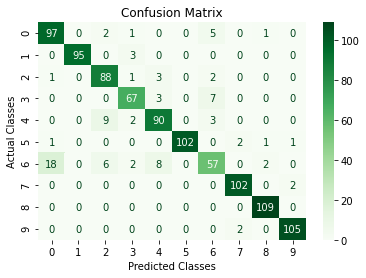

In [25]:
%%time
# Test report for OBD+HSQGL12 method
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --test --use-cuda --ds_name 'FashionMNIST' \
  --input_model 'OBD_HSQGL12' --output_model 'OBD_HSQGL12'

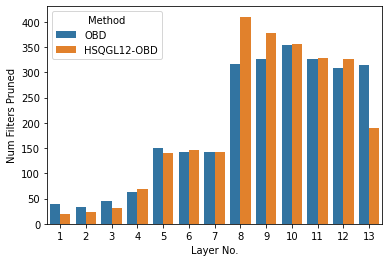

In [22]:
%matplotlib inline
# نمایش تعداد فیلترهای هرس شده در هر لایه
pkl_file = open('FashionMNIST_OBD_dic.pkl','rb')
dic = pkl.load(pkl_file)
dic_obd = bar_filters_pruned(dic)

pkl_file = open('FashionMNIST_HSQGL12_OBD_dic.pkl','rb')
dic = pkl.load(pkl_file)
dic_reg_obd = bar_filters_pruned(dic)

d = {
    'OBD': dic_obd,
    'HSQGL12-OBD': dic_reg_obd
}
df = pd.DataFrame(d)
df1 = df.stack().reset_index().rename(columns={'level_1': 'Method', 0: 'Num Filters Pruned'})
df1.rename(columns={"level_0": "Layer No."},inplace=True)
sns.barplot(x=df1['Layer No.'], y='Num Filters Pruned', data=df1, hue='Method')

In [32]:
!ls -as models

total 1834336
     4 .		           0 for_models.txt  229284 OBD_HSQGL12.pt
     4 ..		      326440 HSQGL12_OBD.pt  229280 OBD.pt
    44 Fashion_landa_1e4.zip  524640 HSQGL12.pt      524640 vgg.pt


In [ ]:
from finetune_SpReg_pds import ModifiedVGG16Model
import torch.nn as nn
models_dir = 'models/'

ds_name = 'FashionMNIST'
eps = 1e-4
mdl_list = ['vgg.pt' ,'HSQGL12.pt']#, 'OBD.pt', 'HSQGL12_OBD.pt', 'OBD_HSQGL12.pt']
te = 134289088#134256320 #134268738
for mdl in mdl_list:
    model_file_name = models_dir+mdl
    model = torch.load(model_file_name, map_location=lambda storage, loc: storage)
    num_el = 0
    num_zeros = 0
    for n, _module in model.named_modules():
#         print(_module)
        if isinstance(_module, nn.Conv2d) or isinstance(_module, nn.Linear) and (not 'downsample' in n):
            w = torch.flatten(_module.weight)
            num_el += w.shape[0]
            num_zeros += torch.sum(torch.abs(w)<eps)
    ze = num_zeros.cpu().detach().numpy()
#     print(mdl, num_zeros, num_el, nz/num_el)
    print("{} ze:{}, ne/te:{:.3f}, ze/te:{:.3f}".format(mdl,num_zeros.cpu(), num_el/te, ze/te))
    # num_el

vgg.pt ze:1793847, ne/te:1.000, ze/te:0.013
HSQGL12.pt ze:15506298, ne/te:1.000, ze/te:0.115


In [30]:
models_dir = 'models/'
eps = 1e-4
model = torch.load('models/vgg.pt', map_location=lambda storage, loc: storage)
te, _ = num_parameters(model,eps)
print('Total Parameters:', te)
mdl_list = ['vgg.pt', 'HSQGL12.pt', 'OBD.pt', 'HSQGL12_OBD.pt', 'OBD_HSQGL12.pt']
for mdl in mdl_list:
  model_file_name = models_dir+mdl
  model = torch.load(model_file_name, map_location=lambda storage, loc: storage)
  num_el, ze = num_parameters(model,eps)
  print("{} ne:{}, ze:{}, ne/te:{:.3f}, ze/te:{:.3f}".format(mdl, num_el, ze, num_el/te, ze/te))
  print(" 1-ne/te:{:.3f}, 1-ze/te:{:.3f}".format(1-num_el/te, 1-ze/te))


Total Parameters: 134289088
vgg.pt ne:134289088, ze:1793847, ne/te:1.000, ze/te:0.013
 1-ne/te:0.000, 1-ze/te:0.987
HSQGL12.pt ne:134289088, ze:15506298, ne/te:1.000, ze/te:0.115
 1-ne/te:0.000, 1-ze/te:0.885
OBD.pt ne:58680632, ze:597914, ne/te:0.437, ze/te:0.004
 1-ne/te:0.563, 1-ze/te:0.996
HSQGL12_OBD.pt ne:83553154, ze:837428, ne/te:0.622, ze/te:0.006
 1-ne/te:0.378, 1-ze/te:0.994
OBD_HSQGL12.pt ne:58680632, ze:1822784, ne/te:0.437, ze/te:0.014
 1-ne/te:0.563, 1-ze/te:0.986


In [29]:
!zip -r Fashion_landa_1e5.zip ./Fashion*.*
files.download('Fashion_landa_1e5.zip')

updating: FashionMNIST_HSQGL12_cm.pkl (deflated 48%)
updating: FashionMNIST_HSQGL12_OBD_cm.pkl (deflated 50%)
updating: FashionMNIST_HSQGL12_OBD_dic.pkl (deflated 32%)
updating: FashionMNIST_loss.pkl (deflated 8%)
updating: FashionMNIST_OBD_cm.pkl (deflated 50%)
updating: FashionMNIST_OBD_dic.pkl (deflated 33%)
updating: FashionMNIST_OBD_HSQGL12_cm.pkl (deflated 51%)
updating: FashionMNIST_vgg_cm.pkl (deflated 49%)
